In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Baca dataset dari URL
url = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/usgs_california_1968_2018.csv"
data = pd.read_csv(url)

# Ambil kolom magnitude
magnitudes = data['mag']

# Hitung distribusi frekuensi gempa bumi berdasarkan magnitudo
hist, bin_edges = np.histogram(magnitudes, bins=50)  # Banyaknya bins bisa disesuaikan

# Hitung cumulative sum dari distribusi frekuensi
cumulative = np.cumsum(hist)

# Hitung confidence interval (biasanya pada interval tertentu, seperti 95%)
confidence_level = 0.85
confidence_interval = np.sqrt(1 / (2 * len(magnitudes))) * np.sqrt(np.log(1 / (1 - confidence_level)))

# Temukan titik patahan atau change point
change_points = np.diff(np.sign(np.diff(cumulative)))

# Pastikan ada titik patahan yang ditemukan sebelum melanjutkan
if np.any(change_points == -2):
    # Temukan indeks titik patahan
    point_index = np.where(change_points == -2)[0][0] + 1

    # Ambil magnitudo yang sesuai dengan titik patahan
    magnitudes_sorted = np.sort(magnitudes)
    mc_value = magnitudes_sorted[point_index]

    print(f"Nilai Mc yang dihitung: {mc_value}")

    # Visualisasi distribusi magnitudo
    plt.figure(figsize=(8, 6))
    plt.hist(magnitudes, bins=50, alpha=0.7, color='blue')
    plt.axvline(x=mc_value, color='red', linestyle='--', label=f"Nilai Mc: {mc_value}")
    plt.xlabel('Magnitude')
    plt.ylabel('Frequency')
    plt.title('Distribution of Earthquake Magnitudes')
    plt.legend()
    plt.show()
else:
    print("Tidak ada titik patahan yang ditemukan untuk menghitung Mc.")


Tidak ada titik patahan yang ditemukan untuk menghitung Mc.


<ipython-input-4-a63e4954cbc3>:21: RuntimeWarning: invalid value encountered in log10
  likelihood = -n_above_mc * np.log10(np.exp(-1)) + n_above_mc * np.log10(np.mean(mags) - mc)


Nilai Mc yang diestimasi menggunakan MLE: 2.788351882125767


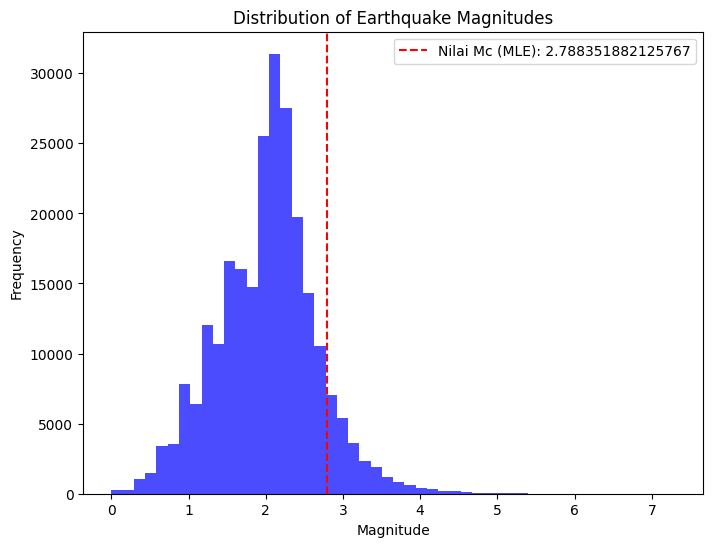

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# Baca dataset dari URL
url = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/usgs_california_1968_2018.csv"
data = pd.read_csv(url)

# Ambil kolom magnitude
magnitudes = data['mag']

# Hitung distribusi frekuensi gempa bumi berdasarkan magnitudo
hist, bin_edges = np.histogram(magnitudes, bins=50)  # Banyaknya bins bisa disesuaikan

# Fungsi likelihood
def likelihood_function(mc, mags):
    # Hitung jumlah gempa dengan magnitudo di atas Mc
    n_above_mc = np.sum(mags >= mc)
    # Likelihood function - Poisson distribution
    likelihood = -n_above_mc * np.log10(np.exp(-1)) + n_above_mc * np.log10(np.mean(mags) - mc)
    return -likelihood

# Mencari nilai Mc dengan memaksimalkan likelihood function
result = minimize_scalar(likelihood_function, args=(magnitudes,), method='bounded', bounds=(min(magnitudes), max(magnitudes)))

# Nilai Mc yang diestimasi menggunakan MLE
mc_mle = result.x
print(f"Nilai Mc yang diestimasi menggunakan MLE: {mc_mle}")

# Visualisasi distribusi magnitudo
plt.figure(figsize=(8, 6))
plt.hist(magnitudes, bins=50, alpha=0.7, color='blue')
plt.axvline(x=mc_mle, color='red', linestyle='--', label=f"Nilai Mc (MLE): {mc_mle}")
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.title('Distribution of Earthquake Magnitudes')
plt.legend()
plt.show()


<ipython-input-5-e91b0b33c19b>:19: RuntimeWarning: invalid value encountered in log10
  likelihood = -n_above_mc * np.log10(np.exp(-1)) + n_above_mc * np.log10(np.mean(mags) - mc)


Nilai Mc yang diestimasi menggunakan MLE: 2.788351882125767
Confidence interval dari Mc: (2.5591722753757042, 2.788351882125767)


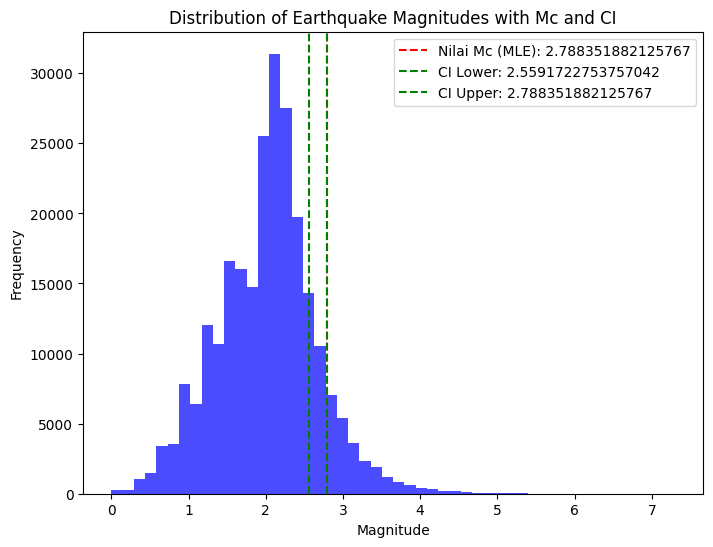

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# Baca dataset dari URL
url = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/usgs_california_1968_2018.csv"
data = pd.read_csv(url)

# Ambil kolom magnitude
magnitudes = data['mag']

# Hitung distribusi frekuensi gempa bumi berdasarkan magnitudo
hist, bin_edges = np.histogram(magnitudes, bins=50)  # Banyaknya bins bisa disesuaikan

# Fungsi likelihood
def likelihood_function(mc, mags):
    n_above_mc = np.sum(mags >= mc)
    likelihood = -n_above_mc * np.log10(np.exp(-1)) + n_above_mc * np.log10(np.mean(mags) - mc)
    return -likelihood

# Mencari nilai Mc dengan memaksimalkan likelihood function
result = minimize_scalar(likelihood_function, args=(magnitudes,), method='bounded', bounds=(min(magnitudes), max(magnitudes)))

# Nilai Mc yang diestimasi menggunakan MLE
mc_mle = result.x
print(f"Nilai Mc yang diestimasi menggunakan MLE: {mc_mle}")

# Bootstrap untuk menentukan confidence interval
n_iterations = 1000  # Jumlah iterasi bootstrap
bootstrap_mc_values = []

for i in range(n_iterations):
    bootstrap_sample = np.random.choice(magnitudes, size=len(magnitudes), replace=True)
    bootstrap_result = minimize_scalar(likelihood_function, args=(bootstrap_sample,), method='bounded', bounds=(min(bootstrap_sample), max(bootstrap_sample)))
    bootstrap_mc_values.append(bootstrap_result.x)

# Confidence interval dari nilai Mc
ci_lower = np.percentile(bootstrap_mc_values, 2.5)  # Lower bound (2.5%)
ci_upper = np.percentile(bootstrap_mc_values, 97.5)  # Upper bound (97.5%)
print(f"Confidence interval dari Mc: ({ci_lower}, {ci_upper})")

# Visualisasi distribusi magnitudo dan Mc
plt.figure(figsize=(8, 6))
plt.hist(magnitudes, bins=50, alpha=0.7, color='blue')
plt.axvline(x=mc_mle, color='red', linestyle='--', label=f"Nilai Mc (MLE): {mc_mle}")
plt.axvline(x=ci_lower, color='green', linestyle='--', label=f"CI Lower: {ci_lower}")
plt.axvline(x=ci_upper, color='green', linestyle='--', label=f"CI Upper: {ci_upper}")
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.title('Distribution of Earthquake Magnitudes with Mc and CI')
plt.legend()
plt.show()


<ipython-input-6-4d65a9bee0a0>:19: RuntimeWarning: invalid value encountered in log10
  likelihood = -n_above_mc * np.log10(np.exp(-1)) + n_above_mc * np.log10(np.mean(mags) - mc)


Nilai Mc yang diestimasi menggunakan MLE: 2.788351882125767
Confidence interval dari Mc: (2.5591722753757042, 2.788351882125767)


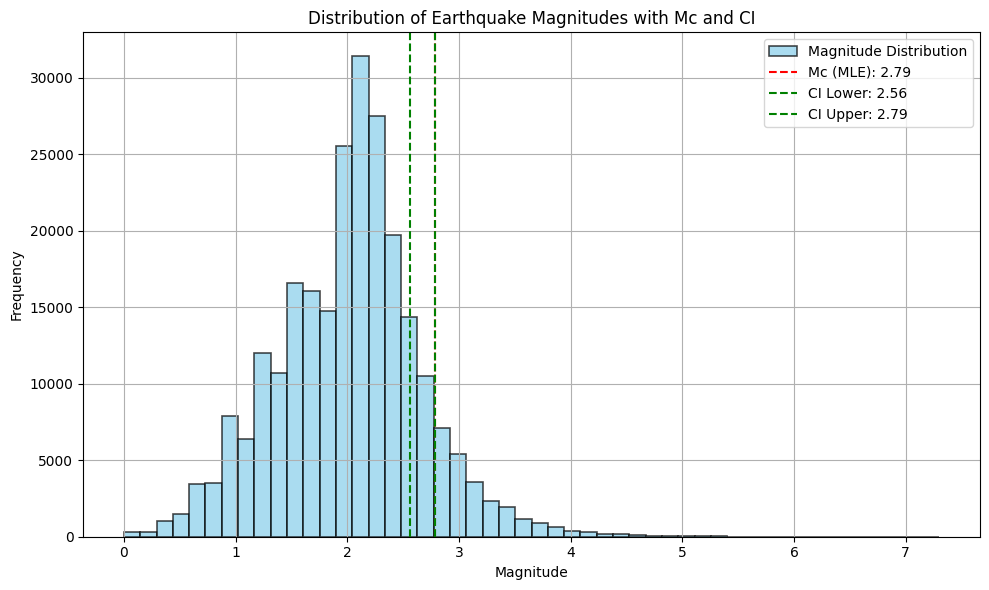

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# Baca dataset dari URL
url = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/usgs_california_1968_2018.csv"
data = pd.read_csv(url)

# Ambil kolom magnitude
magnitudes = data['mag']

# Hitung distribusi frekuensi gempa bumi berdasarkan magnitudo
hist, bin_edges = np.histogram(magnitudes, bins=50)  # Banyaknya bins bisa disesuaikan

# Fungsi likelihood
def likelihood_function(mc, mags):
    n_above_mc = np.sum(mags >= mc)
    likelihood = -n_above_mc * np.log10(np.exp(-1)) + n_above_mc * np.log10(np.mean(mags) - mc)
    return -likelihood

# Mencari nilai Mc dengan memaksimalkan likelihood function
result = minimize_scalar(likelihood_function, args=(magnitudes,), method='bounded', bounds=(min(magnitudes), max(magnitudes)))

# Nilai Mc yang diestimasi menggunakan MLE
mc_mle = result.x
print(f"Nilai Mc yang diestimasi menggunakan MLE: {mc_mle}")

# Bootstrap untuk menentukan confidence interval
n_iterations = 1000  # Jumlah iterasi bootstrap
bootstrap_mc_values = []

for i in range(n_iterations):
    bootstrap_sample = np.random.choice(magnitudes, size=len(magnitudes), replace=True)
    bootstrap_result = minimize_scalar(likelihood_function, args=(bootstrap_sample,), method='bounded', bounds=(min(bootstrap_sample), max(bootstrap_sample)))
    bootstrap_mc_values.append(bootstrap_result.x)

# Confidence interval dari nilai Mc
ci_lower = np.percentile(bootstrap_mc_values, 2.5)  # Lower bound (2.5%)
ci_upper = np.percentile(bootstrap_mc_values, 97.5)  # Upper bound (97.5%)
print(f"Confidence interval dari Mc: ({ci_lower}, {ci_upper})")

# Visualisasi distribusi magnitudo dan Mc
plt.figure(figsize=(10, 6))

# Histogram distribusi magnitudo
plt.hist(magnitudes, bins=50, alpha=0.7, color='skyblue', edgecolor='black', linewidth=1.2, label='Magnitude Distribution')

# Nilai Mc (MLE) dan Confidence Interval
plt.axvline(x=mc_mle, color='red', linestyle='--', label=f"Mc (MLE): {mc_mle:.2f}")
plt.axvline(x=ci_lower, color='green', linestyle='--', label=f"CI Lower: {ci_lower:.2f}")
plt.axvline(x=ci_upper, color='green', linestyle='--', label=f"CI Upper: {ci_upper:.2f}")

# Tampilan grafik
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.title('Distribution of Earthquake Magnitudes with Mc and CI')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Tampilkan grafik
plt.show()


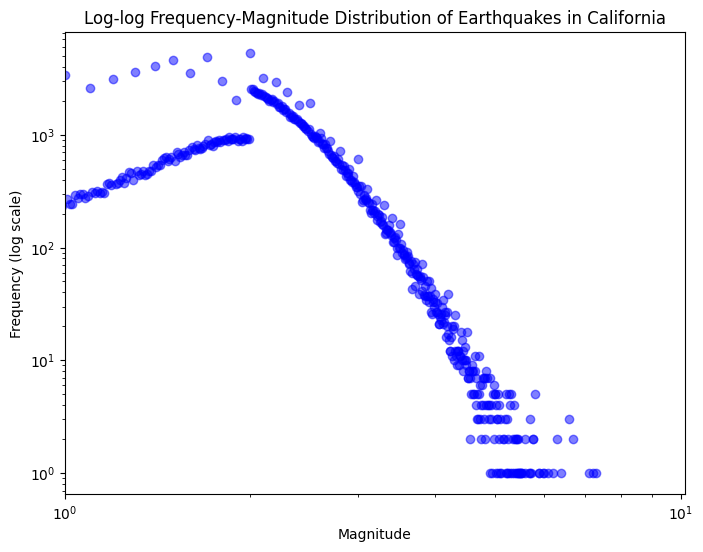

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Baca dataset dari URL
url = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/usgs_california_1968_2018.csv"
data = pd.read_csv(url)

# Ambil kolom magnitude
magnitudes = data['mag']

# Hitung frekuensi kemunculan magnitudo gempa
unique_magnitudes, counts = np.unique(magnitudes, return_counts=True)

# Plot log-log frekuensi gempa terhadap magnitudo
plt.figure(figsize=(8, 6))
plt.scatter(unique_magnitudes, counts, color='blue', alpha=0.5)
plt.yscale('log')
plt.xscale('log')
plt.xlim(left=10**0)  # Mulai dari 10^0 = 1
plt.xlabel('Magnitude')
plt.ylabel('Frequency (log scale)')
plt.title('Log-log Frequency-Magnitude Distribution of Earthquakes in California')

plt.show()
